# Fitting the distribution of heights data
## Instructions

In this assessment you will write code to perform a steepest descent to fit a Gaussian model to the distribution of heights data that was first introduced in *Mathematics for Machine Learning: Linear Algebra*.

The algorithm is the same as you encountered in *Gradient descent in a sandpit* but this time instead of descending a pre-defined function, we shall descend the $\chi^2$ (chi squared) function which is both a function of the parameters that we are to optimise, but also the data that the model is to fit to.

## How to submit

Complete all the tasks you are asked for in the worksheet. When you have finished and are happy with your code, press the **Submit Assingment** button at the top of this notebook.

## Get started
Run the cell below to load dependancies and generate the first figure in this worksheet.

<IPython.core.display.Javascript object>


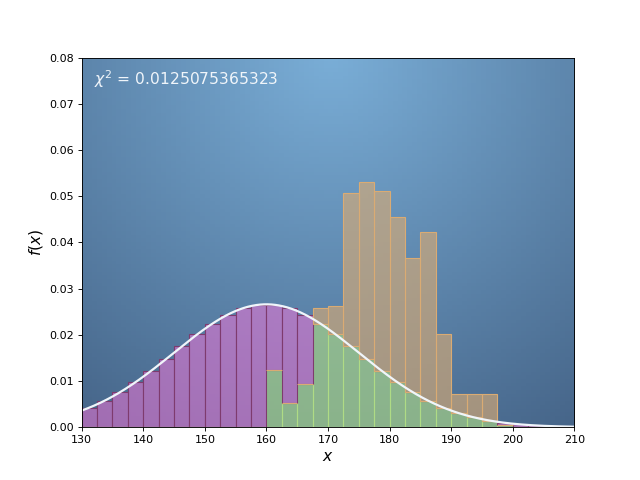

In [1]:
# Run this cell first to load the dependancies for this assessment,
# and generate the first figure.
from readonly.HeightsModule import *

## Background
If we have data for the heights of people in a population, it can be plotted as a histogram, i.e., a bar chart where each bar has a width representing a range of heights, and an area which is the probability of finding a person with a height in that range.
We can look to model that data with a function, such as a Gaussian, which we can specify with two parameters, rather than holding all the data in the histogram.

The Gaussian function is given as,
$$f(\mathbf{x};\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(\mathbf{x} - \mu)^2}{2\sigma^2}\right)$$

The figure above shows the data in orange, the model in magenta, and where they overlap in green.
This particular model has not been fit well - there is not a strong overlap.

Recall from the videos the definition of $\chi^2$ as the squared difference of the data and the model, i.e $\chi^2 = |\mathbf{y} - f(\mathbf{x};\mu, \sigma)|^2$. This is represented in the figure as the sum of the squares of the pink and orange bars.

Don't forget that $\mathbf{x}$ an $\mathbf{y}$ are represented as vectors here, as these are lists of all of the data points, the |*abs-squared*|${}^2$ encodes squaring and summing of the residuals on each bar.

To improve the fit, we will want to alter the parameters $\mu$ and $\sigma$, and ask how that changes the $\chi^2$.
That is, we will need to calculate the Jacobian,
$$ \mathbf{J} = \left[ \frac{\partial ( \chi^2 ) }{\partial \mu} , \frac{\partial ( \chi^2 ) }{\partial \sigma} \right]\;. $$

Let's look at the first term, $\frac{\partial ( \chi^2 ) }{\partial \mu}$, using the multi-variate chain rule, this can be written as,
$$ \frac{\partial ( \chi^2 ) }{\partial \mu} = -2 (\mathbf{y} - f(\mathbf{x};\mu, \sigma)) \cdot \frac{\partial f}{\partial \mu}(\mathbf{x};\mu, \sigma)$$
With a similar expression for $\frac{\partial ( \chi^2 ) }{\partial \sigma}$; try and work out this expression for yourself.

The Jacobians rely on the derivatives $\frac{\partial f}{\partial \mu}$ and $\frac{\partial f}{\partial \sigma}$.
Write functions below for these.

In [2]:
# PACKAGE
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# GRADED FUNCTION

# This is the Gaussian function.
def f (x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig

# Next up, the derivative with respect to μ.
# If you wish, you may want to express this as f(x, mu, sig) multiplied by chain rule terms.
# === COMPLETE THIS FUNCTION ===
def dfdmu (x,mu,sig) :
    return f(x, mu, sig) * (x - mu) / (sig ** 2)

# Finally in this cell, the derivative with respect to σ.
# === COMPLETE THIS FUNCTION ===
def dfdsig (x,mu,sig) :
    return f(x, mu, sig) * (-1 / sig + ((x - mu)** 2) / sig ** 3)

Next recall that steepest descent shall move around in parameter space proportional to the negative of the Jacobian,
i.e., $\begin{bmatrix} \delta\mu \\ \delta\sigma \end{bmatrix} \propto -\mathbf{J} $, with the constant of proportionality being the *aggression* of the algorithm.

Modify the function below to include the $\frac{\partial ( \chi^2 ) }{\partial \sigma}$ term of the Jacobian, the $\frac{\partial ( \chi^2 ) }{\partial \mu}$ term has been included for you.

In [8]:
# GRADED FUNCTION

# Complete the expression for the Jacobian, the first term is done for you.
# Implement the second.
# === COMPLETE THIS FUNCTION ===
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig), # Replace the ??? with the second element of the Jacobian.
    ])
    step = -J * aggression
    return step

## Test your code before submission
To test the code you've written above, run all previous cells (select each cell, then press the play button [ ▶| ] or press shift-enter).
You can then use the code below to test out your function.
You don't need to submit these cells; you can edit and run them as much as you like.

<IPython.core.display.Javascript object>


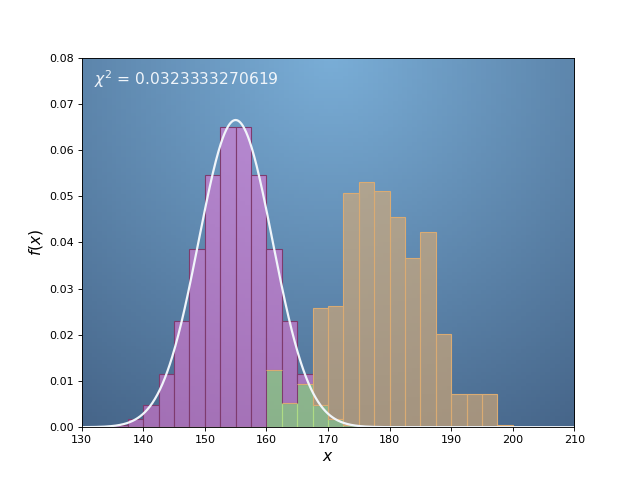

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# First get the heights data, ranges and frequencies
x,y = heights_data()

# Next we'll assign trial values for these.
mu = 155 ; sig = 6
# We'll keep a track of these so we can plot their evolution.
p = np.array([[mu, sig]])

# Plot the histogram for our parameter guess
histogram(f, [mu, sig])
# Do a few rounds of steepest descent.
for i in range(50) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
    p = np.append(p, [[mu,sig]], axis=0)
# Plot the path through parameter space.
contour(f, p)
# Plot the final histogram.
histogram(f, [mu, sig])

Note that the path taken through parameter space is not necesarily the most direct path, as with steepest descent we always move perpendicular to the contours.